In [56]:
from dataset_generator import dataset_generator
from Model import Model
import random
import warnings
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import numpy as np
import tensorflow as tf
import math
import cv2
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
train_set = dataset_generator(10000)
test_set = dataset_generator(100)
validation_set = dataset_generator(30)

In [3]:
x_train = np.array(train_set[0])
y_train = np.array(train_set[1])
x_validation = np.array(validation_set[0])
y_validation = np.array(validation_set[1])
x_test = np.array(test_set[0])
y_test = np.array(test_set[1])

In [4]:
print(x_train.shape)
print(y_train.shape)

(10000, 600, 400, 3)
(10000, 8, 1)


In [5]:
new_y_train = y_train.reshape(10000,8)
new_y_validation  = y_validation.reshape(30,8)
new_y_test = y_test.reshape(100,8)

In [6]:
x_train.shape

(10000, 600, 400, 3)

Cost after epoch 1: 61043.346534
Cost after epoch 2: 382.995413
Cost after epoch 3: 334.955699
Cost after epoch 4: 324.571862
Cost after epoch 5: 351.669630
Cost after epoch 6: 320.401361
Cost after epoch 7: 324.098537
Cost after epoch 8: 354.197861
Cost after epoch 9: 333.598533
Cost after epoch 10: 325.319625


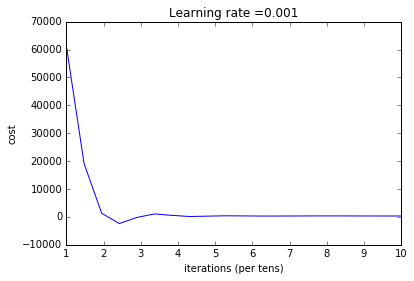

CPU times: user 11h 54min 26s, sys: 2h 5min 41s, total: 14h 7s
Wall time: 5h 4min 31s


In [14]:
%%time
model = Model()
model.train(x_train,x_validation, new_y_train, new_y_validation, learning_rate = 0.001, num_epochs = 10, minibatch_size = 32)

In [15]:
model.predict(x_test[:3])

array([[  24.7352066 ,   96.12860107,  348.79806519,  112.75649261,
         371.10028076,  529.30407715,   33.74976349,  527.5335083 ],
       [  42.35882187,   71.52844238,  339.60903931,   80.48856354,
         344.75030518,  520.14569092,   38.64998245,  535.95483398],
       [  20.59827614,   51.81804276,  355.85794067,  101.11580658,
         363.59069824,  539.47741699,   77.57732391,  501.70651245]], dtype=float32)

In [16]:
new_y_test[:3]

array([[  15.70103989,  117.3973076 ,  379.41079209,  118.03119824,
         351.41252024,  530.11145568,   40.55815649,  527.05058188],
       [  33.60125431,   74.60279996,  321.69010276,   69.51510848,
         331.81591846,  542.39194265,   27.30629962,  512.22548641],
       [   5.03143548,   40.90526986,  369.58819798,  103.12137734,
         332.49794926,  569.36627113,   56.55444251,  484.26799727]])

## Visualization

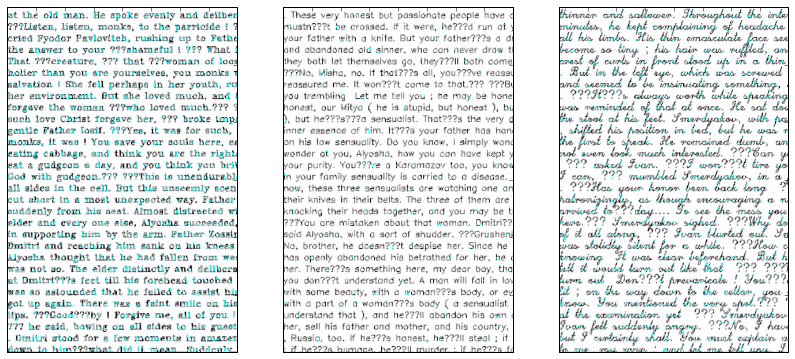

In [55]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(14, 8))
for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    pts_src = new_y_test[i].reshape((4,2))
    pts_dst = np.array([[0, 0], [400, 0], [400, 600],[0, 600]])
    h, status = cv2.findHomography(pts_src, pts_dst)
    vis_img = cv2.warpPerspective(x_test[i], h, (x_test[i].shape[1],x_test[i].shape[0]))
    
    
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(vis_img)